## Data Set Describtion

> Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.
    
   
## Attributes 
|Name        |
|------------- |
|Alcohol|
|Malic acid|
|Ash|
|Alcalinity of ash|  
|Magnesium|
|Total phenols|
|Flavanoids|
|Nonflavanoid phenols|
|Proanthocyanins|
|Color intensity|
|Hue|
|OD280 OD315 of diluted wines|
|Proline|

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [4]:
features = ["Category", "Alcohol", "MalicAcid", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", 
            "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "Diluted", "Proline"]
wine = pd.read_csv("/home/haiqw/Documents/my_projects/iforest/test/wine.data", header=None, names=features)
print ("Description of the Abalone Dataset")
wine.describe()

Description of the Abalone Dataset


,Category,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,Diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


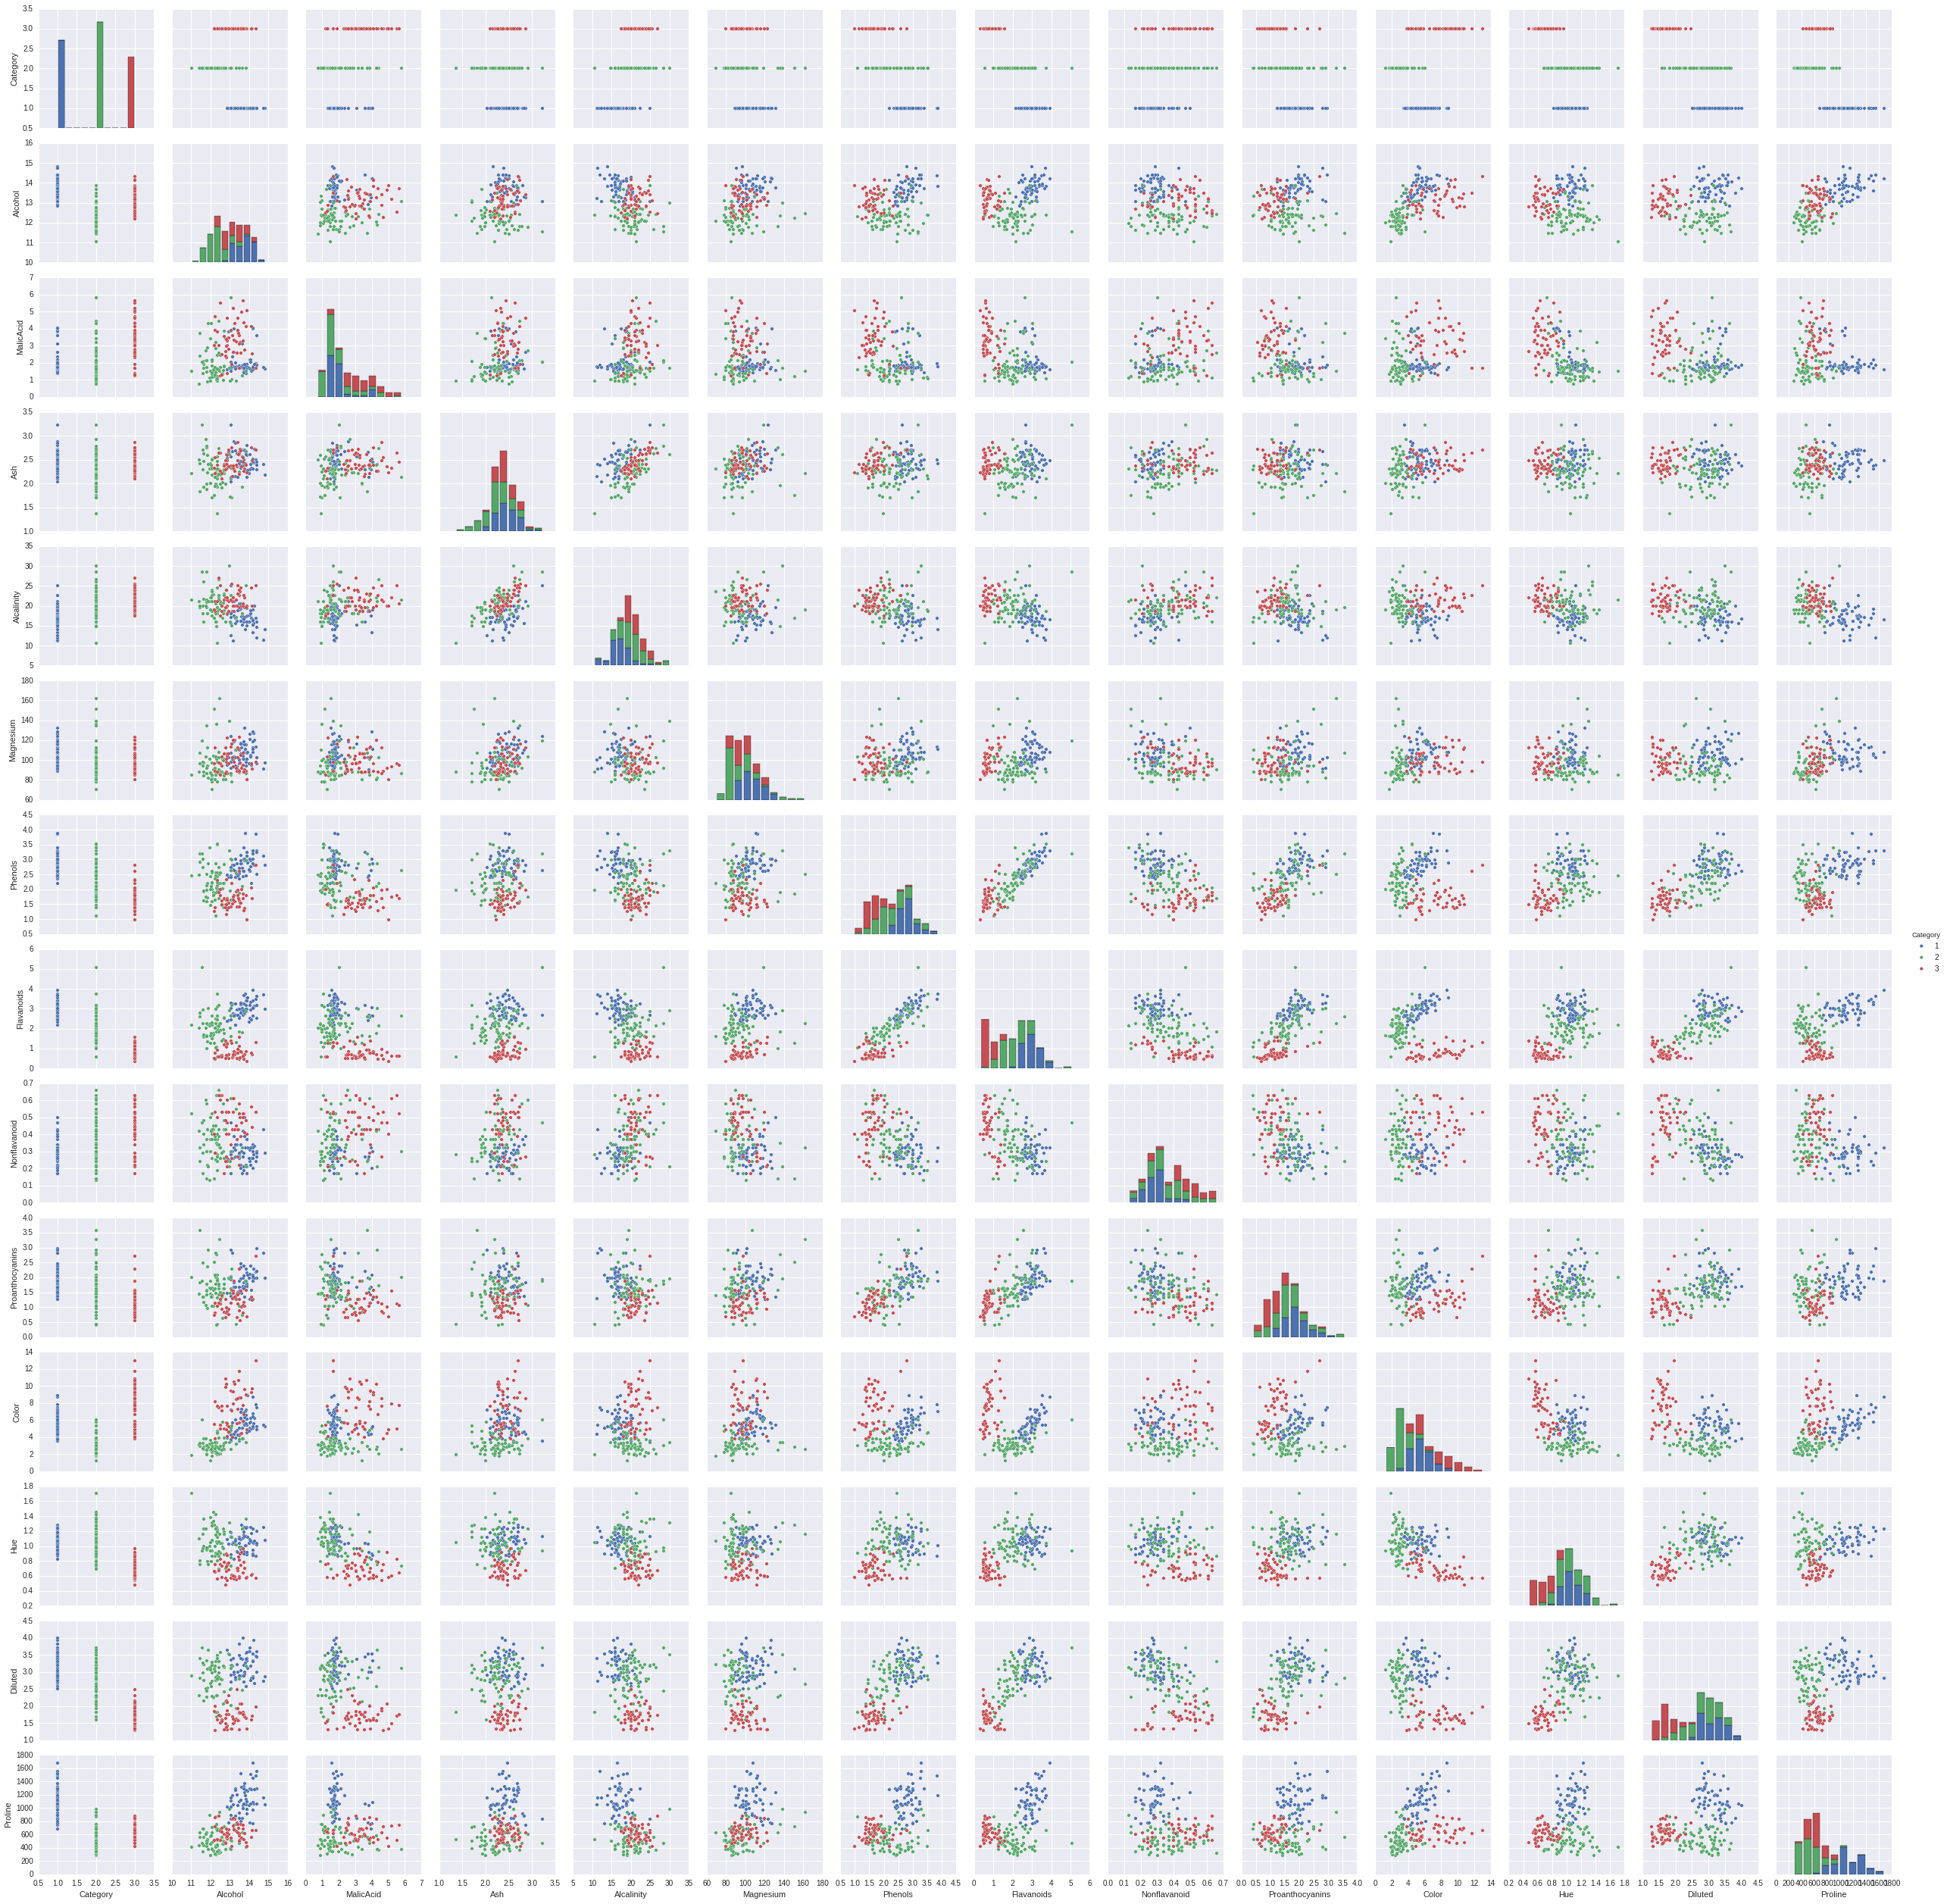

In [16]:
sns.set()
sns.pairplot(wine, hue="Category")

## Wine数据集取样
> 随机选择标签为2(label == 2)的类别中的一个数据样本，取其最近的10个数据样本做为稀有类(即knn的k为10）

> raretree中设置叶子节点的size为20，alpha=0.3, beta=0.7。 选取20个candidate data examples之后， 加入用kmeans(k=2)
精练出15个点， 最后的fscore为0.8.

In [71]:
# subsampling
from sklearn.neighbors import NearestNeighbors

print ("subsampling")
# knn
wine = np.array(wine)
label = 2
X = wine[wine[:,0] == label][:, 1:15]
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# rare_idx = np.where(wine[:,0] == 1)[0]
rare = X[indices[2]]
rare = np.append(np.ones(shape=(indices.shape[1], 1)) * label, rare, axis=1)
major = wine[wine[:,0] != label]

sub_wine = np.append(rare, major, axis=0)
sub_wine = np.append(sub_wine[:, 1:15], np.reshape(sub_wine[:, 0], newshape=(sub_wine.shape[0], 1)), axis=1)
np.savetxt(X=sub_wine, fname="/home/haiqw/Documents/my_projects/iforest/test/sub_wine.data", fmt="%.2f")

subsampling


In [66]:
# kmeans
from sklearn.cluster import KMeans
filtering = np.loadtxt("/home/haiqw/Documents/my_projects/iforest/test/sub_wine_filtering.txt")
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(filtering)

In [70]:
kmeans_model.labels_
wine.shape

(178, 14)